# Random forest classification of galaxies

In this activity, we will be using machine learning to classify galaxies into three types (ellipticals, spirals or galactic mergers) based on their observed properties.

In the last activity you had a go at classifying galaxies by hand on the Galaxy Zoo website which hopefully gave you some intuition for the dataset and how we can distinguish between the different types of galaxy.

For our machine learning experiments, we are using the crowd-classified classes from Galaxy Zoo as the training data for our automatic decision tree classifier.

We'll start by looking at how classification differs from regression. We will then implement some of the new features and parameters that we will use to reduce the dimensionality of the problem. We will also show you how to measure accuracy for classification problems, before extending our classifier to use random forests.

If you would like to try this on your own machine, the data set can be downloaded here.

If you are interested in applying neural networks to the Galaxy Zoo data, we recommend you read the blog post by Mike Walmsley and the paper (https://blog.galaxyzoo.org/tag/neural-networks/).


In the last activity, you were a human classifier for the Galaxy Zoo project and probably saw a wide range of galaxy types observed by the Sloan Digital Sky Survey. In this activity, we will limit our dataset to three types of galaxy: spirals, ellipticals and mergers.

The galaxy catalogue we are using is a sample of galaxies where at least 20 human classifiers (such as yourself) have come to a consensus on the galaxy type.

Examples of spiral and elliptical galaxies were selected where there was a unanimous classification. Due to low sample numbers, we included merger examples where at least 80% of human classifiers selected the merger class.

We need this high quality data to train our classifier.

Just like in the regression activities, we need to decide on a set of key features that represent our data.

While approaches exist that determine their own feature representation and use the raw pixel values as inputs, e.g. neural networks and deep learning, the majority of existing machine learning in astronomy requires an expert to design the feature set.

In this activity we will be using a set of features derived from fitting images according to known galaxy profiles.

Most of the features we use here are based on the five observed flux magnitudes from the Sloan Digital Sky Survey filters:

### The features

The features that we will be using to do our galaxy classification are colour index, adaptive moments, eccentricities and concentrations. These features are provided as part of the SDSS catalogue.

We briefly describe these below. Further information how they are calculated can be found here.

**Colour indices** are the same colours (u-g, g-r, r-i, and i-z) we used for regression. Studies of galaxy evolution tell us that spiral galaxies have younger star populations and therefore are 'bluer' (brighter at lower wavelengths). Elliptical galaxies have an older star population and are brighter at higher wavelengths ('redder').

**Eccentricity** approximates the shape of the galaxy by fitting an ellipse to its profile. Eccentricity is the ratio of the two axis (semi-major and semi-minor). The De Vaucouleurs model was used to attain these two axis. To simplify our experiments, we will use the median eccentricity across the 5 filters.

**Adaptive moments** are a measured quantity to describe the shape of a galaxy. They are used in image analysis to detect similar objects at different sizes and orientations. We use the fourth moment here for each band. You can read more about it here.

**Concentration** is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux.

The Petrosian method allows us to compare the radial profiles of galaxies at different distances. If you are interested, you can read more here on the need for Petrosian approach.

For these experiments, we will define concentration as:

We will use the concentration from the u, r and z bands

### Split the data in train and test sets

To start, we need to split the data into training and testing sets.

Your task is to implement the splitdata_train_test function. It takes a NumPy array and splits it into a training and testing NumPy array based on the specified training fraction. The function takes two arguments and should return two values:

Arguments
data: the NumPy array containing the galaxies in the form described in the previous slide;
fraction_training: the fraction of the data to use for training. This will be a float between 0 and 1.
The number of training rows should be truncated if necessary. For example, with a fraction of 0.67 and our 780 galaxies, the number of training rows is 780*0.67 = 722.6, which should be truncated to 722 using int. The remaining rows should be used for testing.

Return values
training_set: the first value is a NumPy array training set;
testing_set: the second value is a NumPy array testing set.
Using the supplied driver code, and our input data and a fraction of 0.7, the program should print the following values:

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234

In [7]:
import numpy as np
data = np.load('galaxy_catalogue.npy')

In [4]:
np.random.seed(0)
np.random.shuffle(data)

In [8]:
data[0]

(1.85765, 0.67158, 0.4231, 0.3061, 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623, 5.174814, 8.263009, 11.47734, 'merger')

In [10]:
for name, value in zip(data.dtype.names, data[0]):
  print('{:10} {:.6}'.format(name, value))

u-g        1.85765
g-r        0.67158
r-i        0.4231
i-z        0.3061
ecc        0.585428
m4_u       2.25195
m4_g       2.33985
m4_r       2.38065
m4_i       2.35974
m4_z       2.39553
petroR50_u 3.09512
petroR50_r 3.81892
petroR50_z 3.82623
petroR90_u 5.17481
petroR90_r 8.26301
petroR90_z 11.4773
class      merger


In [31]:
features = data[sorted(set(data.dtype.names)-set(['class']))]

In [11]:
    features = data[sorted(set(data.dtype.names)-set(['class']))]
    targets = data['class']

array(['merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merger',
       'merger', 'merger', 'merger', 'merger', 'merger', 'merg

In [37]:
import numpy as np
data = np.load('galaxy_catalogue.npy')

def splitdata_train_test(data, fraction_training):
  # complete this function
    np.random.seed(0)
    np.random.shuffle(data)
    split_index = int(fraction_training*len(data))
    return data[:split_index], data[split_index:]
    
if __name__ == "__main__":
    data = np.load('galaxy_catalogue.npy')

    # set the fraction of data which should be in the training set
    fraction_training = 0.7

    # split the data using your function
    training, testing = splitdata_train_test(data, fraction_training)

    # print the key values
    print('Number data galaxies:', len(data))
    print('Train fraction:', fraction_training)
    print('Number of galaxies in training set:', len(training))
    print('Number of galaxies in testing set:', len(testing))


Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


### Generate features and targets

![title](pic1.png)

In [39]:
import numpy as np

def generate_features_targets(data):
  # complete the function by calculating the concentrations

    targets = data['class']

    features = np.empty(shape=(len(data), 13))
    features[:, 0] = data['u-g']
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']
    features[:, 4] = data['ecc']
    features[:, 5] = data['m4_u']
    features[:, 6] = data['m4_g']
    features[:, 7] = data['m4_r']
    features[:, 8] = data['m4_i']
    features[:, 9] = data['m4_z']

    # fill the remaining 3 columns with concentrations in the u, r and z filters
    # concentration in u filter
    features[:, 10] = data['petroR50_u']/data['petroR90_u']
    # concentration in r filter
    features[:, 11] = data['petroR50_r']/data['petroR90_r']
    # concentration in z filter
    features[:, 12] = data['petroR50_z']/data['petroR90_z']

    return features, targets


if __name__ == "__main__":
    data = np.load('galaxy_catalogue.npy')

    features, targets = generate_features_targets(data)

    # Print the shape of each array to check the arrays are the correct dimensions. 
    print("Features shape:", features.shape)
    print("Targets shape:", targets.shape)


Features shape: (780, 13)
Targets shape: (780,)


### Train the decision tree classifier

It is time to use the functions we wrote to split the data and generate the features, and then train a decision tree classifier.

Your task is complete the dtc_predict_actual function by following the Python comments. The purpose of the function is to perform a held out validation and return the predicted and actual classes for later comparison.

The function takes a single argument which is the full data set and should return two NumPy arrays containing the predicted and actual classes respectively.

You will also need to copy your solutions from the previous two questions into the spaces allocated.

In [42]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):
  # complete this function
    np.random.seed(0)
    np.random.shuffle(data)
    split_index = int(fraction_training*len(data))
    return data[:split_index], data[split_index:]

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

    targets = data['class']

    features = np.empty(shape=(len(data), 13))
    features[:, 0] = data['u-g']
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']
    features[:, 4] = data['ecc']
    features[:, 5] = data['m4_u']
    features[:, 6] = data['m4_g']
    features[:, 7] = data['m4_r']
    features[:, 8] = data['m4_i']
    features[:, 9] = data['m4_z']

    # fill the remaining 3 columns with concentrations in the u, r and z filters
    # concentration in u filter
    features[:, 10] = data['petroR50_u']/data['petroR90_u']
    # concentration in r filter
    features[:, 11] = data['petroR50_r']/data['petroR90_r']
    # concentration in z filter
    features[:, 12] = data['petroR50_z']/data['petroR90_z']

    return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
    training, testing = splitdata_train_test(data, 0.7)
    
  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
    train_features, train_targets = generate_features_targets(training)
    test_features, test_targets = generate_features_targets(testing)
    
  # instantiate a decision tree classifier
    dtr = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
    dtr.fit(train_features, train_targets)

  # get predictions for the test_features
    predictions = dtr.predict(test_features)

  # return the predictions and the test_targets
    return predictions, test_targets


if __name__ == '__main__':
    data = np.load('galaxy_catalogue.npy')
    
    predicted_class, actual_class = dtc_predict_actual(data)

    # Print some of the initial results
    print("Some initial results...\n   predicted,  actual")
    for i in range(10):
        print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


### Accuracy

![title](pic2.png)

In addition to an overall accuracy score, we'd also like to know where our model is going wrong. For example, were the incorrectly classified mergers mis-classified as spirals or ellipticals? To answer this type of question we use a confusion matrix. An example confusion matrix for our problem is shown below:

Confusion Matrix
A Confusion Matrix for ellipticals, mergers, and spirals. Click to enlarge.
The x axis represents the predicted classes and the y axis represents the correct classes. The value in each cell is the number of examples with those predicted and actual classes. Correctly classified objects are along the diagonal of the matrix.

So of the 260 actual spirals (correct class) in the data set, 198 are correctly predicted as spirals, 5 are incorrectly predicted as ellipticals and 57 are incorrectly predicted as mergers.

The sum along each row or column can be used to get the totals of true and predicted classes. So for example, by summing each of the rows we can confirm that there are 260 mergers, 260 spirals and 260 ellipticals in the data set.

Your task is to complete the calculate_accuracy function. The function should calculate the accuracy: the fraction of predictions that are correct (i.e. the model score):

accuracy = correct predictions / predictions
 
The function takes two arguments;

predicted: an array of the predicted class for each galaxy.
actual: an array of the actual class for each galaxy.
The return value should be a float (between 0 and 1).

In [44]:
predicted_class, actual_class = dtc_predict_actual(data)

In [45]:
predicted_class

array(['spiral', 'spiral', 'merger', 'merger', 'spiral', 'elliptical',
       'merger', 'merger', 'spiral', 'elliptical', 'spiral', 'merger',
       'merger', 'elliptical', 'elliptical', 'elliptical', 'merger',
       'spiral', 'spiral', 'spiral', 'merger', 'spiral', 'elliptical',
       'merger', 'spiral', 'merger', 'spiral', 'elliptical', 'elliptical',
       'spiral', 'elliptical', 'merger', 'merger', 'merger', 'spiral',
       'merger', 'elliptical', 'spiral', 'spiral', 'elliptical', 'merger',
       'elliptical', 'merger', 'merger', 'spiral', 'merger', 'merger',
       'elliptical', 'merger', 'elliptical', 'elliptical', 'spiral',
       'merger', 'spiral', 'elliptical', 'spiral', 'elliptical', 'merger',
       'elliptical', 'spiral', 'merger', 'merger', 'spiral', 'elliptical',
       'elliptical', 'merger', 'spiral', 'elliptical', 'elliptical',
       'merger', 'merger', 'spiral', 'elliptical', 'spiral', 'spiral',
       'merger', 'elliptical', 'spiral', 'merger', 'spiral', 'ellip

Our accuracy score: 0.7871794871794872
Confusion matrix, without normalization
[[200  53   7]
 [ 51 183  26]
 [  4  25 231]]


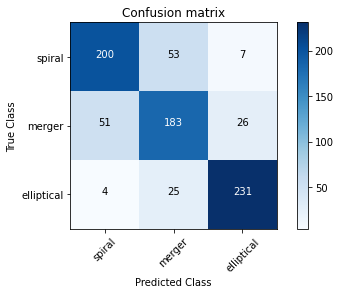

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from support_functions import plot_confusion_matrix, generate_features_targets


# Implement the following function
def calculate_accuracy(predicted, actual):
    correct_predictions = 0
    for i in range(0, len(predicted)):
        if predicted[i]==actual[i]:
            correct_predictions +=1
    return correct_predictions/len(predicted)


#def calculate_accuracy(predicted_classes, actual_classes):
#  return sum(predicted_classes == actual_classes)/len(actual_classes)

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # split the data
  features, targets = generate_features_targets(data)

  # train the model to get predicted and actual classes
  dtc = DecisionTreeClassifier()
  predicted = cross_val_predict(dtc, features, targets, cv=10)

  # calculate the model score using your function
  model_score = calculate_accuracy(predicted, targets)
  print("Our accuracy score:", model_score)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(targets))
  model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

  # Plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()


## Random forest classifier

So far we have used a single decision tree model. However, we can improve the accuracy of our classification by using a collection (or ensemble) of trees as known as a random forest.

A random forest is a collection of decision trees that have each been independently trained using different subsets of the training data and/or different combinations of features in those subsets.

When making a prediction, every tree in the forest gives its own prediction and the most common classification is taken as the overall forest prediction (in regression the mean prediction is used).

Random forests help to mitigate overfitting in decision trees.

**Training data** is spread across decision trees. The subsets are created by taking random samples with replacement. This means that a given data point can be used in several subsets. (This is different from the subsets used in cross validation where each data point belongs to one subset).

**Individual trees** are trained with different subsets of features. So in our current problem, one tree might be trained using eccentricity and another using concentration and the 4th adaptive moment. By using different combinations of input features you create expert trees that are can better identify classes by a given feature.

The sklearn random forest only uses the first form of sampling.

Your task here is to complete the rf_predict_actual function. It returns the predicted and actual classes for our galaxies using a random forest 10-fold with cross validation.

You should use the RandomForestClassifier class from the sklearn.ensemble module. It can be instantiated with:

rfc = RandomForestClassifier(n_estimators=n_estimators)
n_estimators is the the number of decision trees in the forest.

rf_predict_actual takes two arguments: the data used throughout this activity and the number of estimators (n_estimators) to be used in the random forest.

The function should return two NumPy arrays containing the predicted and actual classes respectively.

You can copy and paste the functions from previous questions. However, we have provided the generate_features_targets function in the support library.

Use the cross_val_predict function from the model_selection module as we did in the last question.

You can read its documentation here. This approach allows us to get a prediction for every galaxy in the data set through cross validation. It also means that we don't need to manage the training and test sets.

Accuracy score: 0.8602564102564103
Confusion matrix, without normalization
[[221  37   2]
 [ 39 204  17]
 [  1  13 246]]


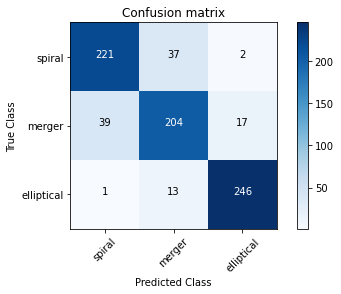

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
#from support_functions import generate_features_targets, plot_confusion_matrix, calculate_accuracy


# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
    # generate the features and targets
    features, targets = generate_features_targets(data)

    # instantiate a random forest classifier using n estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    
    # get predictions using 10-fold cross validation with cross_val_predict
    predictions = cross_val_predict(rfc,X=features,y=targets,  cv= 10)

    # return the predictions and their actual classes
    return predictions, targets

if __name__ == "__main__":
    data = np.load('galaxy_catalogue.npy')

    # get the predicted and actual classes
    number_estimators = 50              # Number of trees
    predicted, actual = rf_predict_actual(data, number_estimators)

    # calculate the model score using your function
    accuracy = calculate_accuracy(predicted, actual)
    print("Accuracy score:", accuracy)

    # calculate the models confusion matrix using sklearns confusion_matrix function
    class_labels = list(set(actual))
    model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

    # plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()


Did the random forest improve the accuracy of the model? The answer is yes – we see a substantial increase in accuracy. When we look at the 10-fold cross validation results, we see that the random forest systematically out performs a single decision tree